# Import Statemments

In [1]:
%matplotlib inline
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
np.random.seed(0)
import seaborn as sns
import random as rnd
import csv
import random
import math
import operator
import copy

# Load and Preprocess DataSet

In [25]:
data=pd.read_csv("/home/aklesh/Documents/SMAI_A2/SMAI_2019201073/airfoil.csv")
data = data.rename(columns={"8.000000000000000000e+03":"Frequency","4.000000000000000000e+00":"Angle","2.285999999999999976e-01":"Length",
"3.960000000000000142e+01":"Velocity","4.738009999999999965e-03":"Thickness","1.131289999999999907e+02":"Label"})

In [28]:
test_data=pd.read_csv("/home/aklesh/Documents/SMAI_A2/SMAI_2019201073/airfoil_test.csv")

In [32]:
#data = data.rename(columns={'1.600000000000000000e+03':"Frequency",'5.400000000000000355e+00':"Angle",'1.524000000000000077e-01':"Length",
#'7.129999999999999716e+01':"Velocity",'4.011990000000000001e-03':"Thickness",'1.332410000000000139e+02':"Label"})

Index(['1.600000000000000000e+03', '5.400000000000000355e+00',
       '1.524000000000000077e-01', '7.129999999999999716e+01',
       '4.011990000000000001e-03', '1.332410000000000139e+02'],
      dtype='object')

In [33]:
test_data.shape

(300, 6)

# Multivariate Linear Regression

In [4]:
class MLinearRegressior:
    def __init__(self,alpha,iterations):
        self.alpha=alpha
        self.maxiter=iterations
    def costfunc(self,X,Y,theta):
        m=X.shape[0]
        error=(np.dot(X,theta)-Y)
        cost=1/(2*m) * np.dot(error.T,error)
        return cost,error
    def gradient_descend(self,X,Y,theta):
        cost_arr = np.zeros(self.maxiter)
        m = X.shape[0]
        for i in range(self.maxiter):
            cost,error=self.costfunc(X,Y,theta)
            theta = (theta - (self.alpha*(1/m)*np.dot(X.T,error)))
            cost_arr[i]=cost
        return theta,cost_arr
        
    def run(self,data,theta):
        X = data[["Frequency","Angle","Length","Velocity","Thickness"]]
        Y = data[["Label"]]
        X = (X-X.mean())/X.std()
        X = np.c_[np.ones(X.shape[0]),X]
        #theta = np.zeros(shape = (X.shape[1],1))
        
        initial_cost,_ = self.costfunc(X,Y,theta)
        theta,cost_arr = self.gradient_descend(X,Y,theta)
        final_cost,_ = self.costfunc(X,Y,theta)
        #print("With theta {0} the final cost of model is {1}".format(theta,final_cost))
        return cost_arr

In [11]:
LGM=MLinearRegressior(0.01,1000)
theta = np.empty(shape = (data.shape[1],1))
theta.fill(10)
cost_arr1 = LGM.run(data,theta)
print(theta.shape)

(1201, 6)
(6, 1)


With theta [[124.73164451]
 [ -4.0165598 ]
 [ -1.37755972]
 [ -2.91443511]
 [  1.49640884]
 [ -2.71547069]] the final cost of model is [[11.64279771]]
With theta [[124.73552993]
 [ -3.13801531]
 [  4.71343725]
 [ -0.33044338]
 [  0.90462505]
 [ -7.30236457]] the final cost of model is [[19.16791556]]
With theta [[ 1.24742006e+02]
 [-1.67377449e+00]
 [ 1.48650989e+01]
 [ 3.97620951e+00]
 [-8.16812498e-02]
 [-1.49471877e+01]] the final cost of model is [[57.13123475]]


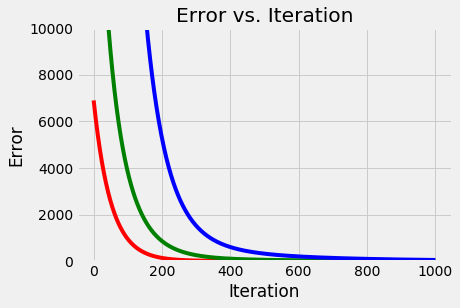

In [177]:
LGM=MLinearRegressior(0.01,1000)
theta = np.empty(shape = (data.shape[1],1))
fig = np.linspace(0, 1000, 1000)
plt.ylim(0,10000)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error vs. Iteration")
theta.fill(10)
cost_arr1 = LGM.run(data,theta)
theta.fill(100)
cost_arr2 = LGM.run(data,theta)
theta.fill(250)
cost_arr3 = LGM.run(data,theta)
plt.plot(fig,cost_arr1,'r')
plt.plot(fig,cost_arr2,'g')
plt.plot(fig,cost_arr3,'b')

With theta [[86.22543001]
 [ 8.06662457]
 [ 8.85661274]
 [11.49932054]
 [ 6.42218259]
 [ 3.94420417]] the final cost of model is [[934.36034097]]
With theta [[124.73207623]
 [ -3.91894374]
 [ -0.70078228]
 [ -2.62732492]
 [  1.43065508]
 [ -3.22512556]] the final cost of model is [[11.91400067]]
With theta [[124.73659784]
 [ -4.1551172 ]
 [ -2.33876021]
 [ -3.3217579 ]
 [  1.59001525]
 [ -1.99127375]] the final cost of model is [[11.50033578]]


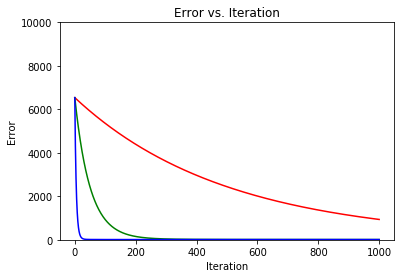

In [16]:
theta = np.empty(shape = (data.shape[1],1))
theta.fill(20)
fig = np.linspace(0, 1000, 1000)
plt.ylim(0,10000)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error vs. Iteration")
LGM1=MLinearRegressior(0.001,1000)
cost_arr1 = LGM1.run(data,theta)
LGM2=MLinearRegressior(0.01,1000)
cost_arr2 = LGM2.run(data,theta)
LGM3=MLinearRegressior(0.1,1000)
cost_arr3 = LGM3.run(data,theta)
plt.plot(fig,cost_arr1,'r')
plt.plot(fig,cost_arr2,'g')
plt.plot(fig,cost_arr3,'b')

# Analysis

### a. When 0-0.5% of values are missing of that feature we can drop those missing values since training set is normally large enough to compansate on accuracy.

### b. When 7-10% of values are missing of that feature we can replace those missing values by some centrality measure(Like mean,variance)

### c. When 60-70% of values are missing of that feature we can train a classfier to classify those missing values.The classifier algorithm is as follows,split dataset into missing and non-missing set,the missing set is test set and nonmissing set as train set with label as known values of 'F'.Let say feature 'F' has 60-70% missing values,so we get predicted F values using this model by testing each missing point against this classifier.But this incure extra compute cost.